In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import  LinearRegression, Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score,mean_squared_error,mean_absolute_error,r2_score


In [ ]:
df=pd.read_csv("../data/ObesityDataSet_raw_and_data_sinthetic.csv")

In [112]:
df.head()

Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  1.0  Sometimes  Public_Transportation   
1                            yes  3.0  0.0  Sometimes  Public_Transportation   
2                            yes  2.0  1.0  Sometimes  Public_Transportation   
3                             no  2.0  0.0  Sometimes                Walking   
4                             no  0.0  0.0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II

- FAVC : Feature, Binary, " Do you eat high caloric food frequently? "
- FCVC : Feature, Integer, " Do you usually eat vegetables in your meals? "
- NCP : Feature, Continuous, " How many main meals do you have daily? "
- CAEC : Feature, Categorical, " Do you eat any food between meals? "
- SMOKE : Feature, Binary, " Do you smoke? "
- CH2O: Feature, Continuous, " How much water do you drink daily? "
- SCC: Feature, Binary, " Do you monitor the calories you eat daily? "
- FAF: Feature, Continuous, " How often do you have physical activity? "
- TUE : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "
- CALC : Feature, Categorical, " How often do you drink alcohol? "
- MTRANS : Feature, Categorical, " Which transportation do you usually use? "

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [114]:
df["Male"] = df["Gender"].map({"Male": 1, "Female": 0})
df=df.drop(columns="Gender")

In [115]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [116]:
df["BMI"]=df["Weight"]/(df["Height"])**2

In [117]:
df["family_with_overweight"]=df["family_history_with_overweight"].map({"yes":1,"no":0})
df=df.drop(columns="family_history_with_overweight")

In [118]:
df["Alcohol"]=df["CALC"].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})
df=df.drop(columns="CALC")

In [119]:
#nos centramos en si se ejercita de alguna forma o depende de un medio de transporte
df["MTRANS"].unique()
df["Andar_bici"]=df["MTRANS"].map({'Public_Transportation':0,'Automobile':0, 'Motorbike':0,'Walking':1,'Bike':1})
df=df.drop(columns="MTRANS")

In [120]:
#Nos vamos a centrar en si la persona pica o no entre horas, independientemente de la frecuencia, ya que no sabemos la cantidad que es lo realmente importante
df["Picoteo"]=df["CAEC"].map({'Sometimes':1, 'Frequently':1, 'Always':1, 'no':0})
df=df.drop(columns="CAEC")

In [121]:
df["Fumador"]=df["SMOKE"].map({'no':0,"yes":1})
df=df.drop(columns="SMOKE")

In [122]:
df["SCC"].unique()
df["Control_kcal"]=df["SCC"].map({'no':0,"yes":1})
df=df.drop(columns="SCC")

In [123]:
df["FastFood"]=df["FAVC"].map({'no':0,"yes":1})
df=df.drop(columns="FAVC")

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     2111 non-null   float64
 1   Height                  2111 non-null   float64
 2   Weight                  2111 non-null   float64
 3   FCVC                    2111 non-null   float64
 4   NCP                     2111 non-null   float64
 5   CH2O                    2111 non-null   float64
 6   FAF                     2111 non-null   float64
 7   TUE                     2111 non-null   float64
 8   NObeyesdad              2111 non-null   object 
 9   Male                    2111 non-null   int64  
 10  BMI                     2111 non-null   float64
 11  family_with_overweight  2111 non-null   int64  
 12  Alcohol                 2111 non-null   int64  
 13  Andar_bici              2111 non-null   int64  
 14  Picoteo                 2111 non-null   

In [125]:
df["FAF"].nunique()

1190

In [126]:
df["Age"]=df["Age"].astype(int)

<Axes: >

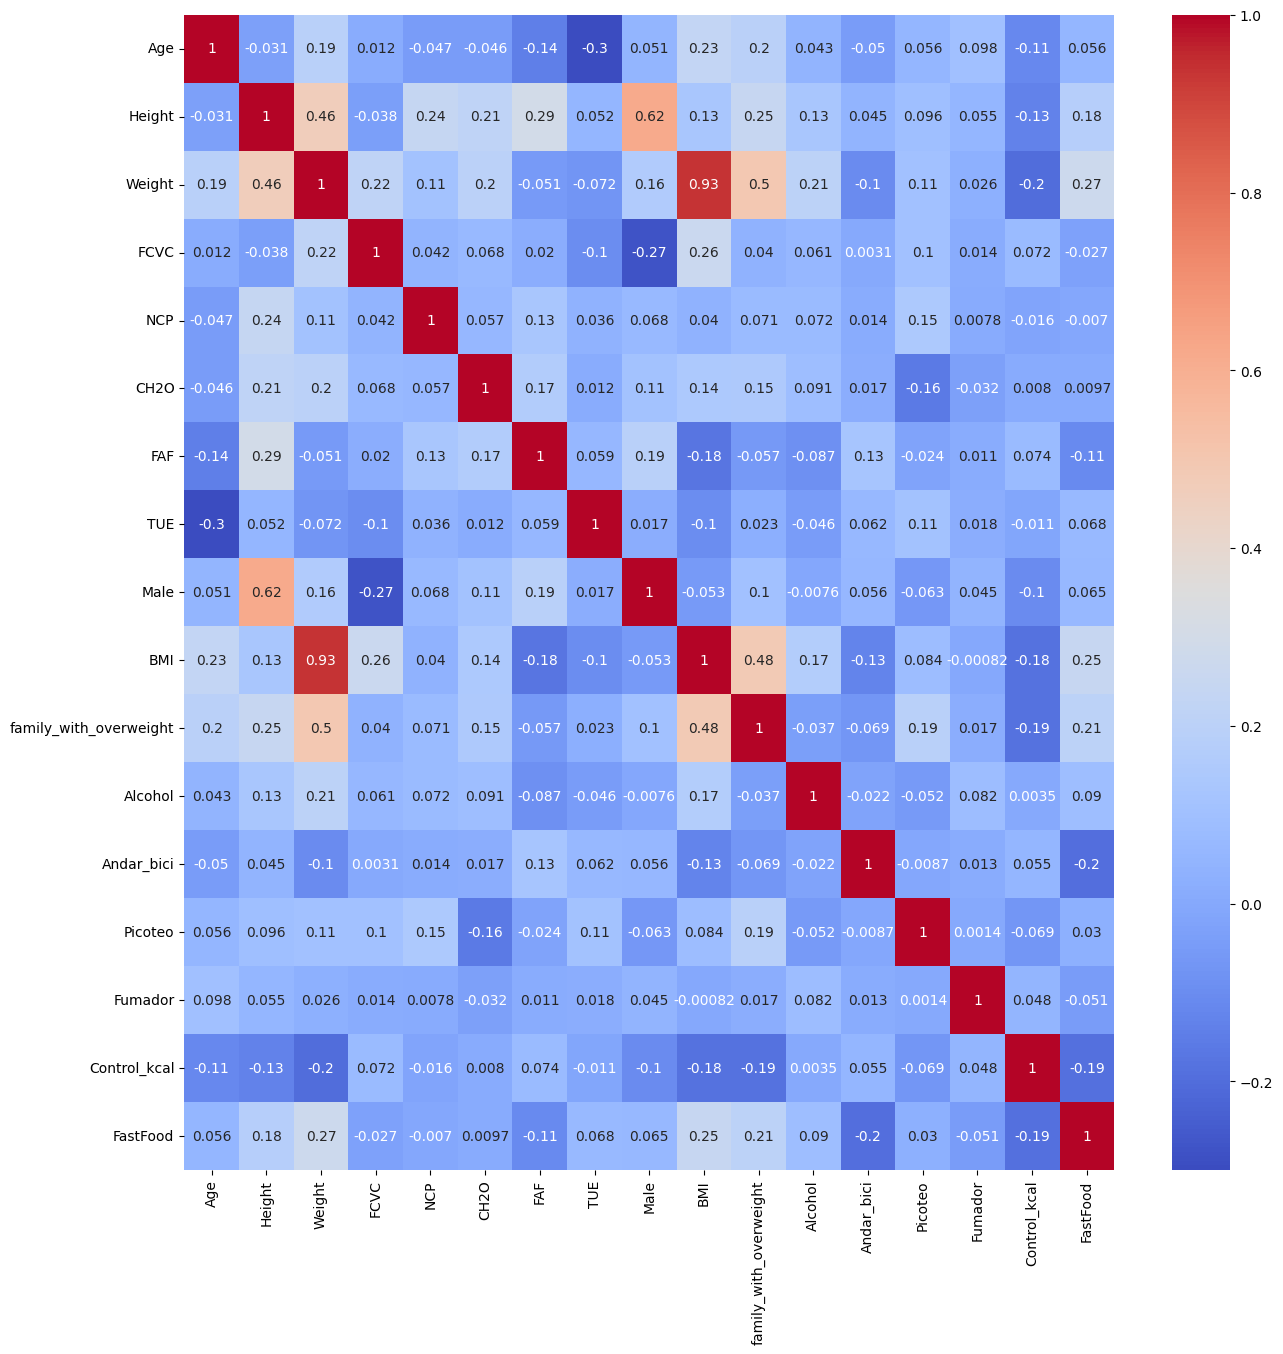

In [127]:
plt.figure(figsize=(15,15))
sns.heatmap((df.drop(columns="NObeyesdad")).corr(),annot=True,cmap="coolwarm")

In [128]:
df.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'NObeyesdad', 'Male', 'BMI', 'family_with_overweight', 'Alcohol',
       'Andar_bici', 'Picoteo', 'Fumador', 'Control_kcal', 'FastFood'],
      dtype='object')

In [129]:
X=df[['Age', 'Height', 'Weight', 'family_with_overweight', 'Alcohol','Andar_bici','Control_kcal', 'FastFood',"Male"]]
y= df["BMI"]

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R2 score", model.score(X_test, y_test))
    print("R2 score train", model.score(X_train, y_train))
    print("MAE", mean_absolute_error(y_test, y_pred))
    print("MSE", mean_squared_error(y_test, y_pred))
    print("RMSE", mean_squared_error(y_test, y_pred) ** (1/2))
    sns.displot(y_pred - y_test)
    return model

In [132]:
scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

R2 score 0.9902139135403228
R2 score train 0.9905006739520524
MAE 0.5975386158017404
MSE 0.6464312554406774
RMSE 0.8040094871583776


LinearRegression()

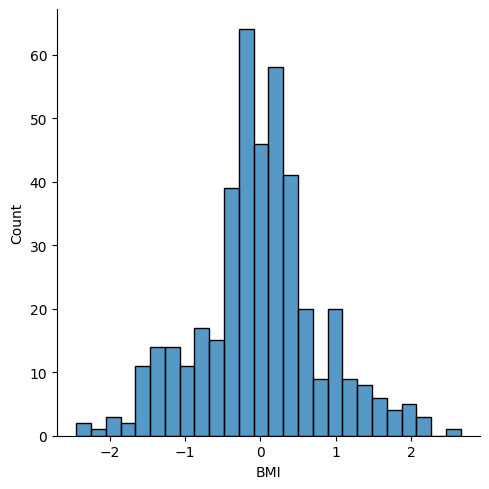

In [133]:
model_1 = train_evaluate_model(LinearRegression(), X_train, y_train, X_test, y_test)
model_1

R2 score 0.9902139135403227
R2 score train 0.9905006739520524
MAE 0.5975386158017337
MSE 0.6464312554406806
RMSE 0.8040094871583796


LinearRegression()

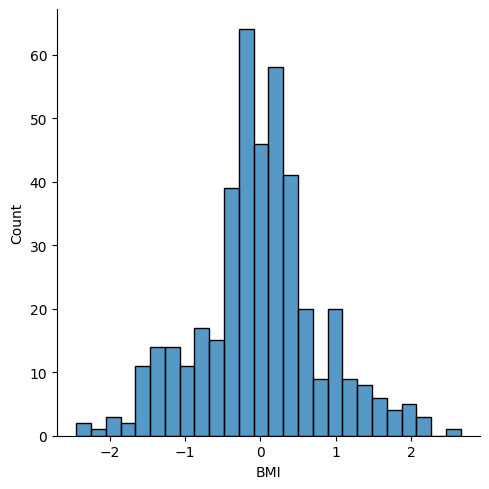

In [134]:
model_2 = train_evaluate_model(LinearRegression(), X_train_scal, y_train, X_test_scal, y_test)
model_2

R2 score 0.986761941247038
R2 score train 0.9868778270722159
MAE 0.7203350516969992
MSE 0.8744552763288164
RMSE 0.9351231343137739


Ridge(alpha=2)

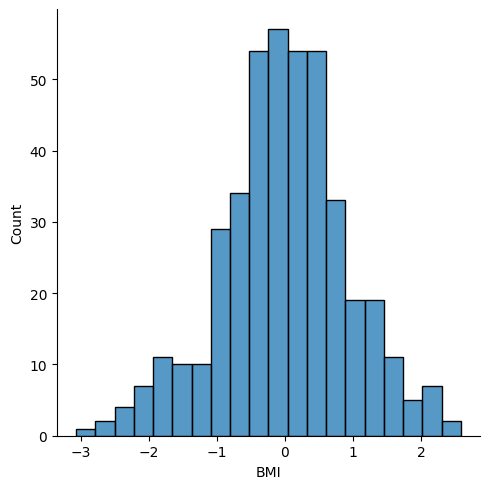

In [135]:
model_4 = train_evaluate_model(Ridge(alpha=2), X_train, y_train, X_test, y_test)
model_4

R2 score 0.9999344818561171
R2 score train 0.999934287134717
MAE 0.047236292542223154
MSE 0.004327876744077243
RMSE 0.06578660003433255


LinearRegression()

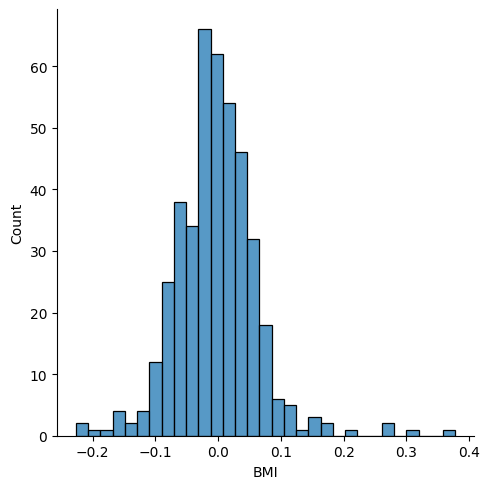

In [136]:
pol_2 = PolynomialFeatures(degree=2)

X_train_pol2 = pol_2.fit_transform(X_train)
X_test_pol2 = pol_2.transform(X_test)

model_5 = train_evaluate_model(LinearRegression(), X_train_pol2, y_train, X_test_pol2, y_test)
model_5

R2 score 0.9934526712797164
R2 score train 0.9838528483612364
MAE 0.5052888649728896
MSE 0.4324913684213821
RMSE 0.6576407593978509


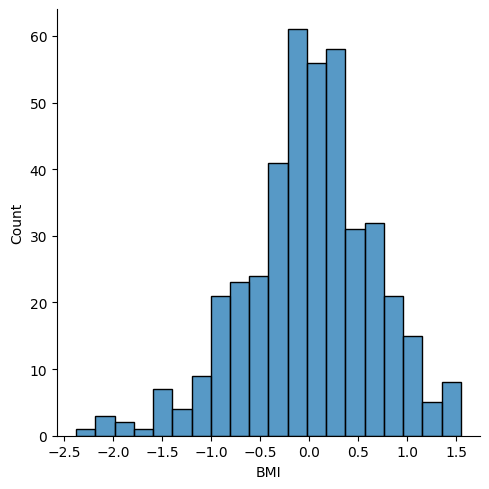

In [137]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rnd_reg = RandomForestRegressor(n_estimators=200,
                                 max_leaf_nodes=32,
                                 random_state=42)
rnd_reg.fit(X_test, y_test)

y_pred_reg = rnd_reg.predict(X_test)
print("R2 score", rnd_reg.score(X_test, y_test))
print("R2 score train",rnd_reg.score(X_train, y_train))
print("MAE", mean_absolute_error(y_test, y_pred_reg))
print("MSE", mean_squared_error(y_test, y_pred_reg))
print("RMSE", mean_squared_error(y_test, y_pred_reg) ** (1/2))
sns.displot(y_pred_reg - y_test)

In [138]:
X_test

Age    Height      Weight  family_with_overweight  Alcohol  Andar_bici  \
544    20  1.755978   53.699561                       1        0           0   
1987   26  1.624950  111.004920                       1        1           0   
420    18  1.850000   60.000000                       1        1           0   
527    21  1.520000   42.000000                       0        1           0   
196    22  1.750000   74.000000                       1        1           1   
...   ...       ...         ...                     ...      ...         ...   
447    19  1.800000   87.000000                       1        1           0   
1793   30  1.650189  101.141277                       1        0           0   
73     19  1.850000   65.000000                       1        1           1   
1711   28  1.758618  113.501549                       1        1           0   
1103   18  1.699667   79.677930                       1        0           0   

      Control_kcal  FastFood  Male  
544              0         1     0  
1987             0         1     0  
420              1         1     1  
527              0         1     0  
196              0         0     1  
...            ...       ...   ...  
447              0         1     1  
1793             0         1     1  
73               0         0     1  
1711             0         1     1  
1103             0         0     1  

[423 rows x 9 columns]

In [139]:
df_resultados = pd.DataFrame({'Age':X_test["Age"], 'Height (m)':X_test['Height'],'Male':X_test['Male'],'Weight (kg)':X_test['Weight'],"BMI": y_pred_reg})

In [141]:
df_resultados.head()

Age  Height (m)  Male  Weight (kg)        BMI
544    20    1.755978     0    53.699561  17.694337
1987   26    1.624950     0   111.004920  41.702516
420    18    1.850000     1    60.000000  18.139699
527    21    1.520000     0    42.000000  18.079755
196    22    1.750000     1    74.000000  24.264697

In [143]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [ ]:
df["NObeyesdad"].rename({"NObeyesdad":"Categoria"},inplace=True)

In [ ]:
def clasificar_bmi(imc):
    if imc < 18.5:
        return 'Insufficient_Weight'
    elif 18.5 <= imc < 24.9:
        return 'Normal_Weight'
    elif 24.9 <= imc < 27.9:
        return 'Overweight_Level_I'
    elif 27.9 <= imc < 29.9:
        return 'Overweight_Level_II'
    elif 29.9 <= imc < 34.9:
        return 'Obesity_Type_I'
    elif 34.9 <= imc <= 39.9:
        return 'Obesity_Type_II'
    else:
        return 'Obesity_Type_III'

df_resultados["Categoria"] = df_resultados["BMI"].apply(clasificar_bmi)


In [ ]:
def calcular_grasa_bmi(row):
    """
    Calcula el porcentaje de grasa corporal basado en el BMI.
    
    Parámetros:
    - row: Una fila del DataFrame con las columnas necesarias
    
    Retorna:
    - Porcentaje estimado de grasa corporal
    """
    bmi = row["BMI"]
    edad = row["Age"]
    sexo = row["Male"]  # 1 para hombres, 0 para mujeres
    
    if sexo == 1:
        return 1.20 * bmi + 0.23 * edad - 16.2
    else:
        return 1.20 * bmi + 0.23 * edad - 5.4  




In [ ]:
df_resultados["Fat_Percentage"] = round(df_resultados.apply(calcular_grasa_bmi, axis=1),2)

df_resultados.head()

Age  Height (m)  Male  Weight (kg)        BMI            Categoria  \
544    20    1.755978     0    53.699561  17.694337  Insufficient_Weight   
1987   26    1.624950     0   111.004920  41.702516     Obesity_Type_III   
420    18    1.850000     1    60.000000  18.139699  Insufficient_Weight   
527    21    1.520000     0    42.000000  18.079755  Insufficient_Weight   
196    22    1.750000     1    74.000000  24.264697        Normal_Weight   

      Fat_Percentage  
544            20.43  
1987           50.62  
420             9.71  
527            21.13  
196            17.98

In [ ]:
X_new=[[24,1.64,54,0,1,0,1,0,0]]
X_kcl_pol2 = pol_2.transform(X_new)
y_pred_kcal = model_5.predict(X_kcl_pol2)
y_pred_reg

c:\Users\UX490U\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([19.26800134])

In [ ]:
# X_new=[[24,1.64,54,0,1,0,1,0,0]]
# y_pred_reg = rnd_reg.predict(X_new)
# y_pred_reg

c:\Users\UX490U\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([19.26800134])

------------------

# GUARDAR MODELO

In [ ]:
import pickle

In [ ]:
with open("../modelos/rnd_reg_obesity.pkl", "wb") as f:
    pickle.dump(rnd_reg, f)

--------------------------------

In [ ]:
df2=pd.read_csv("../data/data_train.csv")

In [ ]:
df2.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            848 non-null    int64  
 1   Gender                         848 non-null    object 
 2   Weight (kg)                    848 non-null    float64
 3   Height (m)                     848 non-null    float64
 4   Max_BPM                        848 non-null    int64  
 5   Avg_BPM                        848 non-null    int64  
 6   Resting_BPM                    848 non-null    int64  
 7   Session_Duration (hours)       848 non-null    float64
 8   Calories_Burned                848 non-null    float64
 9   Workout_Type                   848 non-null    object 
 10  Fat_Percentage                 848 non-null    float64
 11  Water_Intake (liters)          848 non-null    float64
 12  Workout_Frequency (days/week)  848 non-null    int

In [ ]:
df2.describe()

Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  848.000000   848.000000  848.000000  848.000000  848.000000   
mean    38.844340    73.739741    1.725189  179.759434  143.755896   
std     12.071386    21.126962    0.128656   11.507244   14.344656   
min     18.000000    40.000000    1.500000  160.000000  120.000000   
25%     29.000000    58.100000    1.620000  170.000000  131.000000   
50%     40.000000    69.850000    1.715000  180.000000  143.000000   
75%     49.000000    85.900000    1.802500  189.000000  156.000000   
max     59.000000   129.900000    2.000000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   848.000000                848.000000       848.000000      848.000000   
mean     62.188679                  1.257087       906.023585       25.086439   
std       7.321574                  0.338274       271.028122        6.245272   
min      50.000000                  0.500000       303.000000       10.100000   
25%      56.000000                  1.060000       724.750000       21.300000   
50%      62.000000                  1.270000       895.000000       26.400000   
75%      68.000000                  1.450000      1076.500000       29.400000   
max      74.000000                  2.000000      1766.000000       35.000000   

       Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
count             848.000000                     848.000000        848.000000   
mean                2.625118                       3.316038          1.797170   
std                 0.602018                       0.909936          0.734633   
min                 1.500000                       2.000000          1.000000   
25%                 2.175000                       3.000000          1.000000   
50%                 2.600000                       3.000000          2.000000   
75%                 3.100000                       4.000000          2.000000   
max                 3.700000                       5.000000          3.000000   

              BMI  
count  848.000000  
mean    24.787842  
std      6.552125  
min     12.320000  
25%     19.965000  
50%     24.110000  
75%     28.537500  
max     47.720000

In [ ]:
df2.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

Introducir filas kcal diarias (mantener/subir de peso/bajar de peso)
dataset menu diario

In [ ]:
df2.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

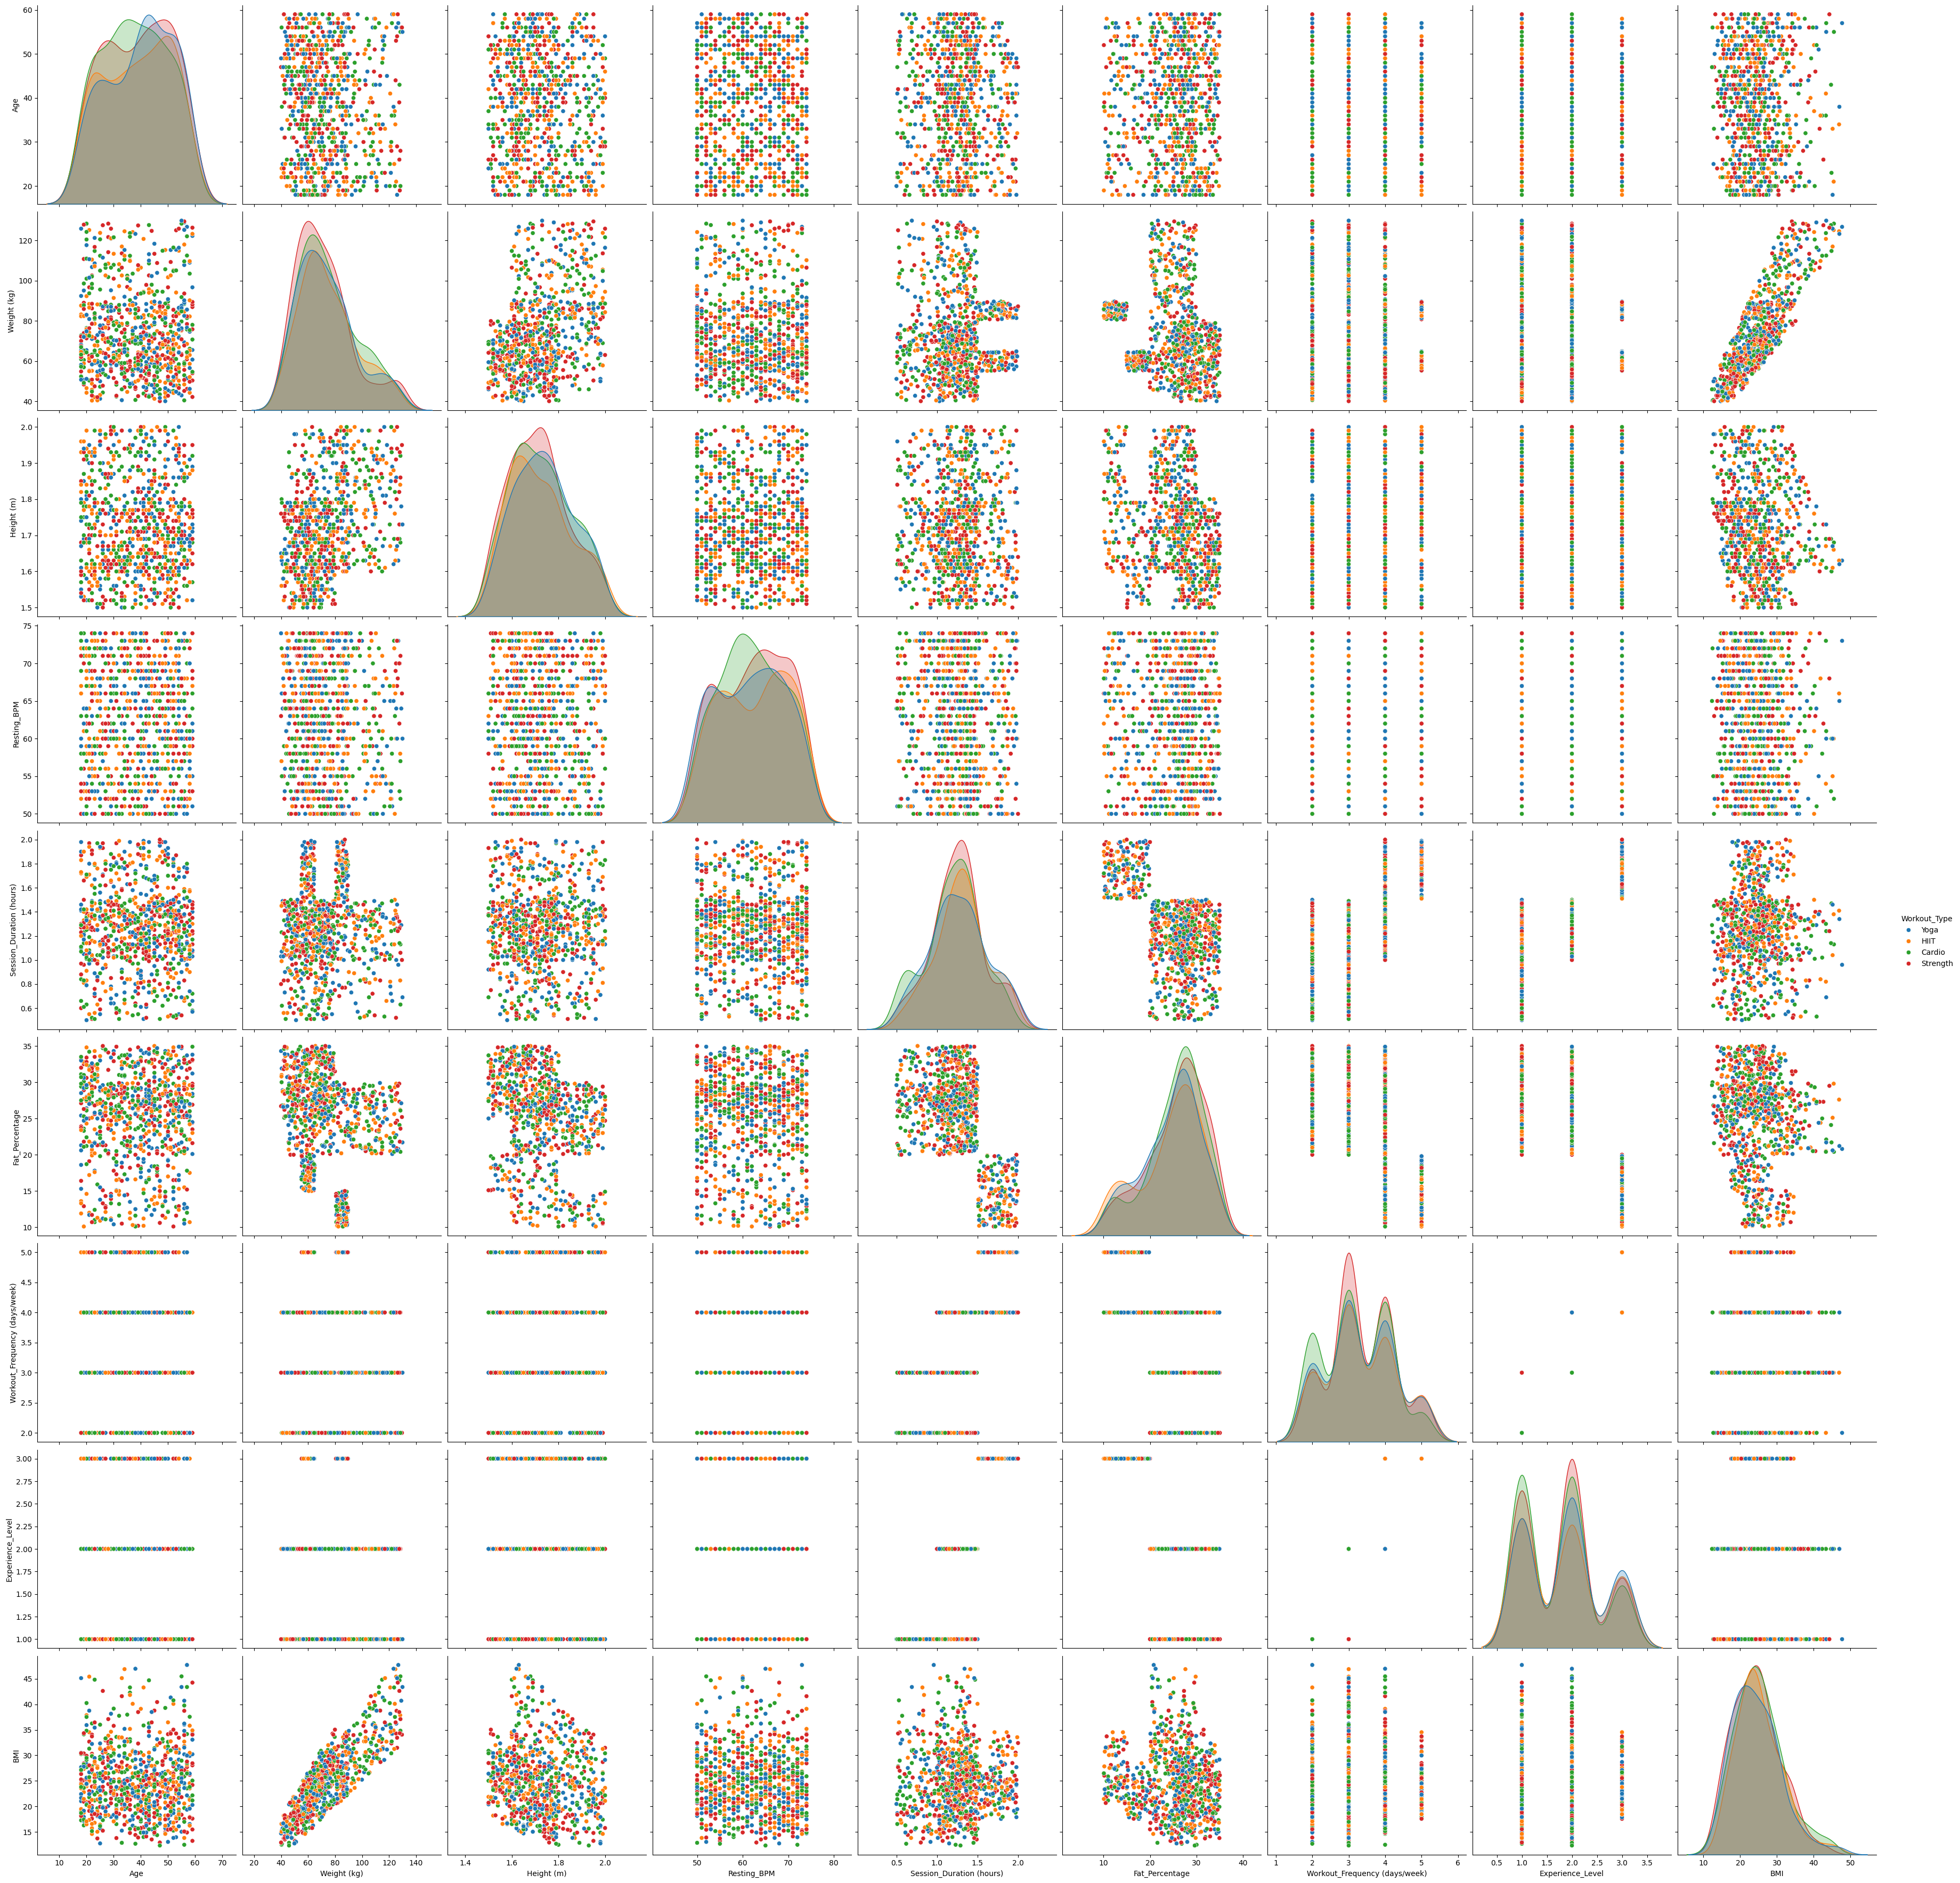

In [67]:
sns.pairplot(df.dropna(),height=4,
            vars=['Age', 'Weight (kg)', 'Height (m)',
       'Resting_BPM', 'Session_Duration (hours)',
       'Fat_Percentage', 
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
            hue='Workout_Type' );

Nuestra TARGET será "Calories_Burned". El objetivo va a ser predecir las calorias quemadas según las condiciones de la persona. Queremos hacer una pagina donde pidamos unos datos minimos de la persona y el tipo de deporte que quiere hacer. Según esos datos sabremos que calorias va a quemar. El siguente paso será calcular el gasto calorico de esa persona sin contar el ejercicio y según el objetivo que tenga (subir,bajar o mantener el peso) se le dará su requerimineto calórico diario 

Como plus el objetivo sería ofrecerle un menú tipo

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            848 non-null    int64  
 1   Gender                         848 non-null    object 
 2   Weight (kg)                    848 non-null    float64
 3   Height (m)                     848 non-null    float64
 4   Max_BPM                        848 non-null    int64  
 5   Avg_BPM                        848 non-null    int64  
 6   Resting_BPM                    848 non-null    int64  
 7   Session_Duration (hours)       848 non-null    float64
 8   Calories_Burned                848 non-null    float64
 9   Workout_Type                   848 non-null    object 
 10  Fat_Percentage                 848 non-null    float64
 11  Water_Intake (liters)          848 non-null    float64
 12  Workout_Frequency (days/week)  848 non-null    int

In [ ]:
df2["Male"] = df2["Gender"].map({"Male": 1, "Female": 0})
df2=df2.drop(columns="Gender")


In [70]:
#df=pd.get_dummies(df, prefix="Workout_Type",dtype=int)

In [ ]:
mapping = {'Yoga': 0, 'Strength': 1, 'Cardio': 2, 'HIIT': 3}
df2['Workout_Type'] = df2['Workout_Type'].map(mapping)


<Axes: >

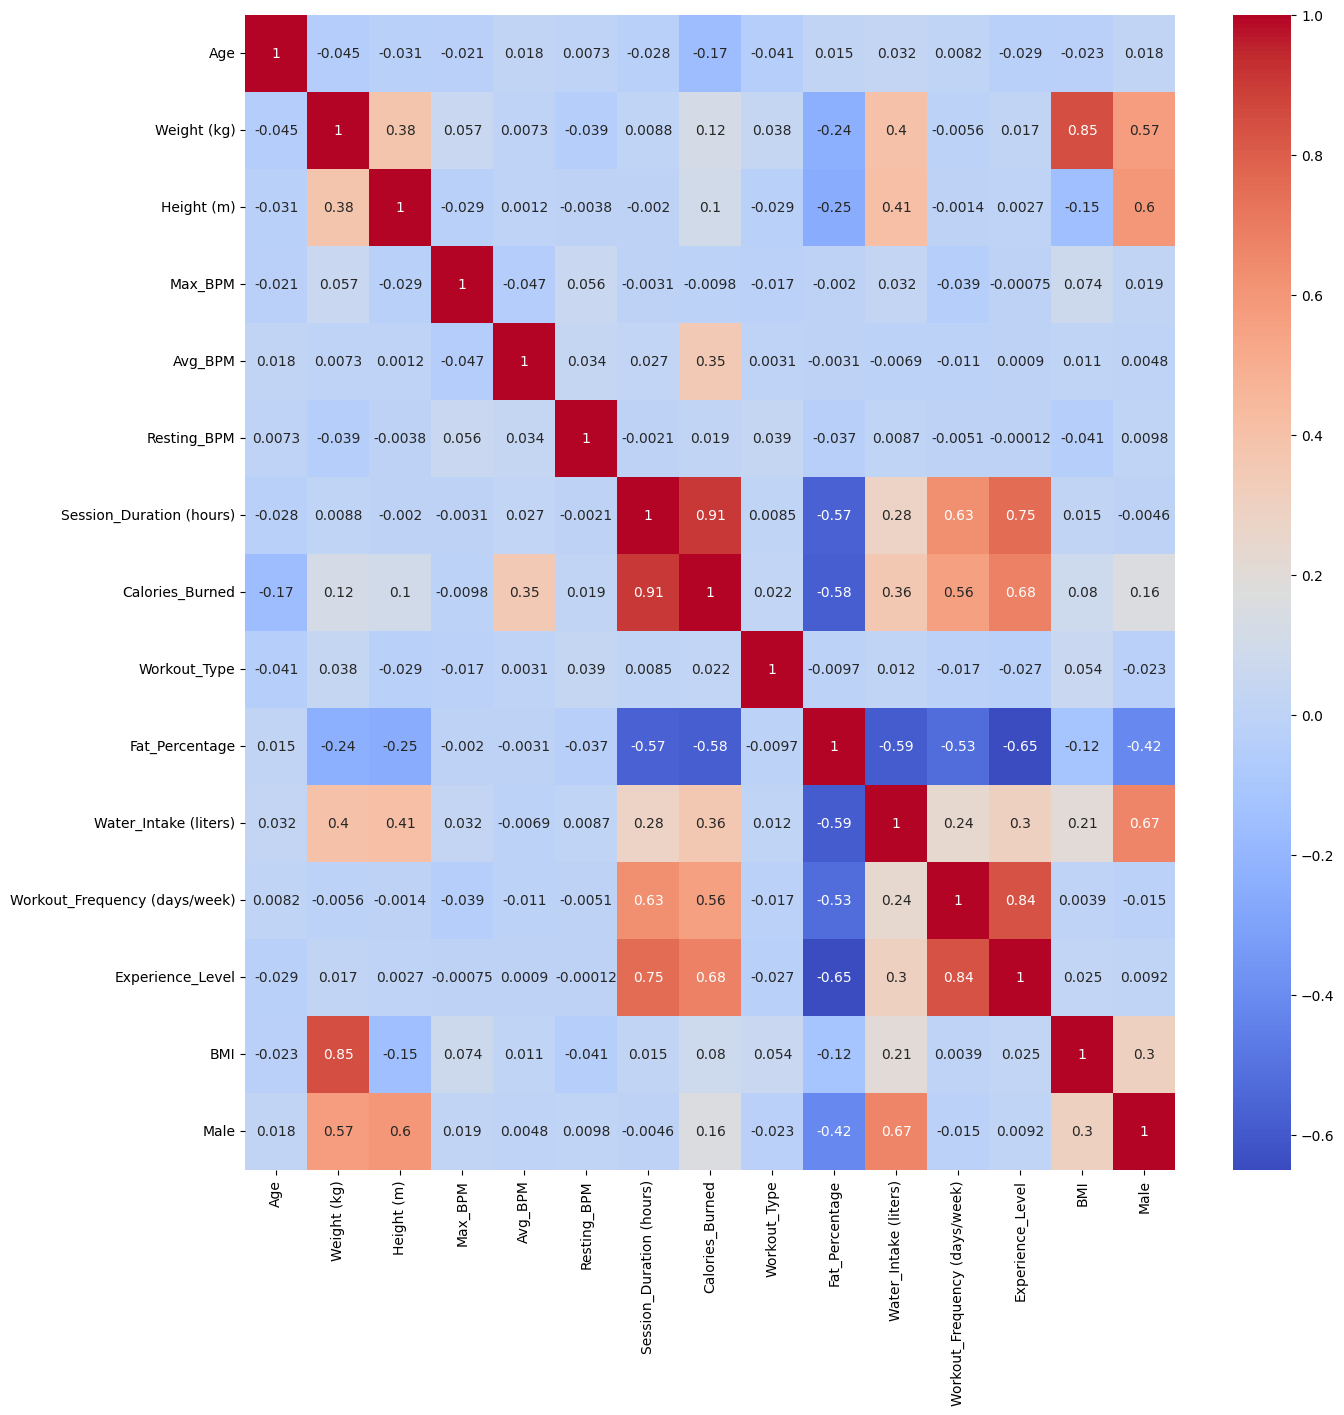

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df2.corr(),annot=True,cmap="coolwarm")

In [ ]:
df2.columns

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Workout_Type',
       'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI', 'Male'],
      dtype='object')

In [ ]:
X= df2[['Age', 'Weight (kg)', 'Height (m)','Session_Duration (hours)','Fat_Percentage','Workout_Frequency (days/week)','Experience_Level','Workout_Type',"Male","BMI"]]
y= df2["Calories_Burned"]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(678, 10)
(170, 10)
(678,)
(170,)


In [77]:
scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

In [78]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [79]:
y_pred = lr.predict(X_test)

print("R2 score test", lr.score(X_test, y_test))
print("R2 score train", lr.score(X_train, y_train))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", mean_squared_error(y_test, y_pred) ** (1/2))

R2 score test 0.8877065591841188
R2 score train 0.8679620457590471
MAE 71.70479231670855
MSE 7719.482985160471
RMSE 87.86058834972863


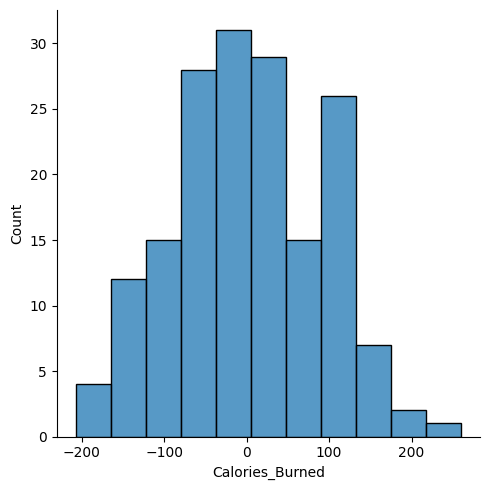

In [80]:
sns.displot(y_pred - y_test)

In [81]:
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R2 score", model.score(X_test, y_test))
    print("R2 score train", model.score(X_train, y_train))
    print("MAE", mean_absolute_error(y_test, y_pred))
    print("MSE", mean_squared_error(y_test, y_pred))
    print("RMSE", mean_squared_error(y_test, y_pred) ** (1/2))
    sns.displot(y_pred - y_test)
    return model

R2 score 0.8877065591841188
R2 score train 0.8679620457590471
MAE 71.70479231670855
MSE 7719.482985160471
RMSE 87.86058834972863


LinearRegression()

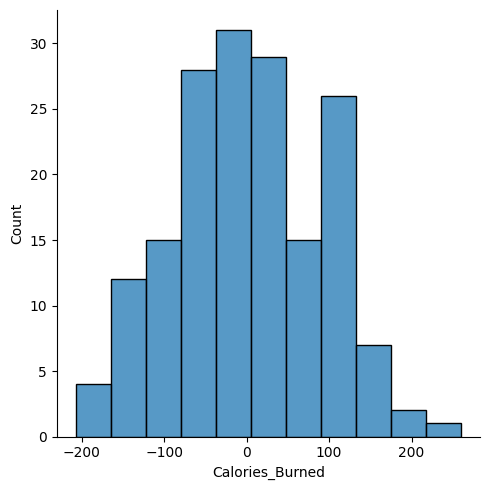

In [ ]:
model_1_2 = train_evaluate_model(LinearRegression(), X_train, y_train, X_test, y_test)
model_1_2

R2 score 0.8877065591841189
R2 score train 0.8679620457590471
MAE 71.70479231670846
MSE 7719.482985160467
RMSE 87.86058834972862


LinearRegression()

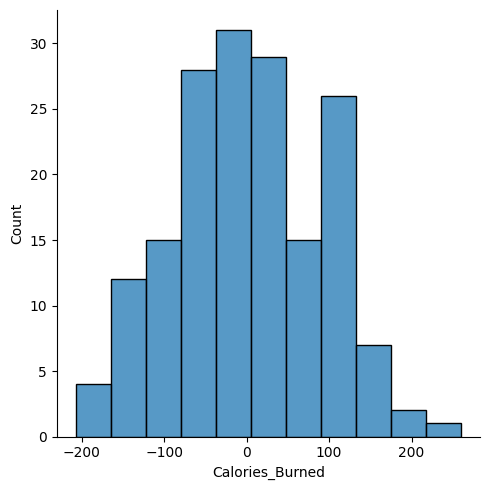

In [ ]:
model_2_2 = train_evaluate_model(LinearRegression(), X_train_scal, y_train, X_test_scal, y_test)
model_2_2

R2 score 0.8843828870527032
R2 score train 0.8664017733072211
MAE 73.43620562065651
MSE 7947.9649898109765
RMSE 89.15135999978338


Ridge(alpha=2)

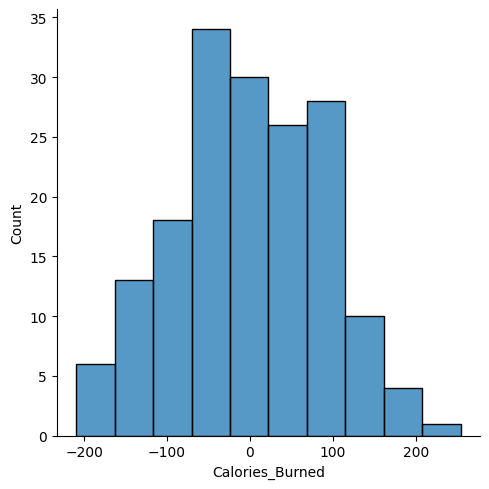

In [ ]:
model_4_2 = train_evaluate_model(Ridge(alpha=2), X_train, y_train, X_test, y_test)
model_4_2

R2 score 0.893777873230189
R2 score train 0.8843050992155188
MAE 69.6604743507346
MSE 7302.117508284141
RMSE 85.45242833462453


LinearRegression()

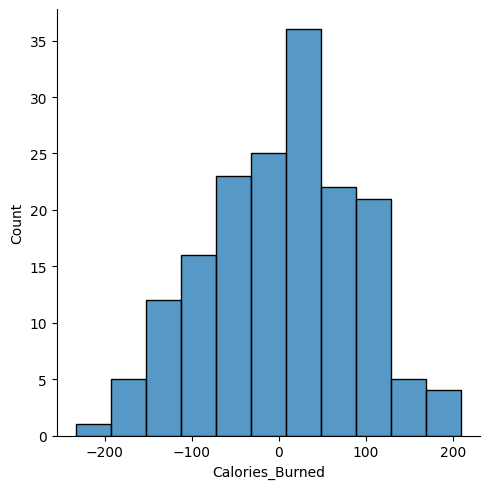

In [ ]:
pol_2_2= PolynomialFeatures(degree=2)

X_train_pol2_2 = pol_2_2.fit_transform(X_train)
X_test_pol2_2 = pol_2_2.transform(X_test)

model_5_2 = train_evaluate_model(LinearRegression(), X_train_pol2, y_train, X_test_pol2, y_test)
model_5_2

R2 score 0.9689385572858984
R2 score train 0.8129079697154206
MAE 37.194660569523
MSE 2135.283029746944
RMSE 46.20912279785177


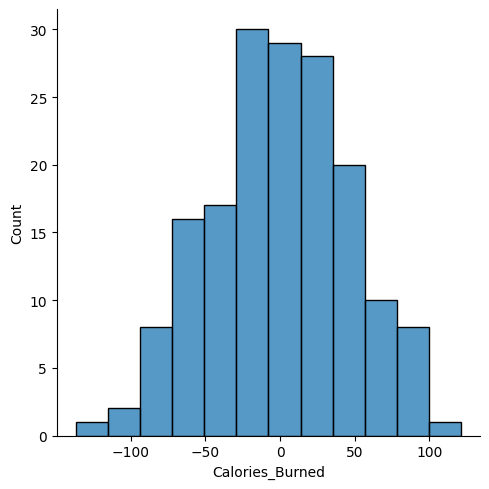

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rnd_reg_2 = RandomForestRegressor(n_estimators=200,
                                 max_leaf_nodes=32,
                                 random_state=42)
rnd_reg_2.fit(X_test, y_test)

y_pred_reg_2 = rnd_reg_2.predict(X_test)
print("R2 score", rnd_reg_2.score(X_test, y_test))
print("R2 score train",rnd_reg_2.score(X_train, y_train))
print("MAE", mean_absolute_error(y_test, y_pred_reg))
print("MSE", mean_squared_error(y_test, y_pred_reg))
print("RMSE", mean_squared_error(y_test, y_pred_reg) ** (1/2))
sns.displot(y_pred_reg - y_test)

Tiene menos dispersión (los valores más alejado se quedan entorno a 100 y no 200), se centran entorno a 0 auqnue tenemos algunas irregularidades. Po

-------------------------

In [ ]:
df_kcal=pd.read_csv("../data/data_test.csv")

In [88]:
df_kcal.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   28  Female         55.1        1.79      192      159           67   
1   47    Male        127.1        1.76      199      157           73   
2   48  Female         69.1        1.60      191      166           53   
3   41  Female         66.8        1.74      164      149           57   
4   26    Male        125.5        1.76      176      163           66   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.99           1582.0         Yoga            17.0   
1                      0.71            552.0     Strength            24.9   
2                      1.34           1001.0     Strength            26.1   
3                      1.34            898.0         Yoga            29.2   
4                      1.15           1031.0         Yoga            23.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    2.7                              5                 3   
1                    3.0                              2                 1   
2                    2.0                              4                 2   
3                    2.3                              3                 1   
4                    3.1                              4                 2   

     BMI  
0  17.20  
1  41.03  
2  26.99  
3  22.06  
4  40.52

In [89]:
df_kcal["Male"] = df_kcal["Gender"].map({"Male": 1, "Female": 0})
df_kcal=df_kcal.drop(columns="Gender")

mapping = {'Yoga': 0, 'Strength': 1, 'Cardio': 2, 'HIIT': 3}
df_kcal['Workout_Type'] = df_kcal['Workout_Type'].map(mapping)

X_kcl= df_kcal[['Age', 'Weight (kg)', 'Height (m)','Session_Duration (hours)','Fat_Percentage','Workout_Frequency (days/week)','Experience_Level','Workout_Type',"Male","BMI"]]


In [90]:
# X_kcl_pol2 = pol_2.transform(X_kcl)
# y_pred_kcal = model_5.predict(X_kcl_pol2)

In [91]:
y_pred_kcal = rnd_reg.predict(X_kcl)

In [92]:
prediccion=pd.DataFrame({"Age":df_kcal["Age"],"kcal":y_pred_kcal})

In [93]:
prediccion.head()

Age         kcal
0   28  1202.216233
1   47   482.794781
2   48   949.491902
3   41   948.380062
4   26   883.312513

In [94]:
df_kcal["Calories_Burned"]

0      1582.0
1       552.0
2      1001.0
3       898.0
4      1031.0
        ...  
119    1035.0
120    1364.0
121    1260.0
122     929.0
123     883.0
Name: Calories_Burned, Length: 124, dtype: float64

In [95]:
df_comprobar=pd.DataFrame({"y_pred":prediccion["kcal"],"y_real": df_kcal["Calories_Burned"]})

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(df_comprobar["y_real"], df_comprobar["y_pred"])
mse = mean_squared_error(df_comprobar["y_real"], df_comprobar["y_pred"])
rmse = np.sqrt(mse)
r2 = r2_score(df_comprobar["y_real"],df_comprobar["y_pred"])

# Mostrar resultados
print(f"MAE: {mae:.2f} kcal")
print(f"RMSE: {rmse:.2f} kcal")
print(f"R² Score: {r2:.2f} (Cuanto más cerca de 1, mejor)")

MAE: 85.38 kcal
RMSE: 116.06 kcal
R² Score: 0.83 (Cuanto más cerca de 1, mejor)


---------------

In [ ]:
df2["Workout_Frequency (days/week)"].unique()

array([4, 3, 5, 2])

In [98]:
def gasto_calorico(genero,peso,altura,frec_ejer,edad,y_pred_kcal):
    if frec_ejer <1:
        frec_ejer=1.2
    elif 1<=frec_ejer <3:
        frec_ejer=1.375
    elif 3<=frec_ejer <=5:
        frec_ejer=1.55
    elif frec_ejer >5:
        frec_ejer=1.725
    
    if genero==1:
        TMB_M=10 * peso + 6.25 * altura -(5 * edad )+ 5       #altura cm
        kcal_d = (TMB_M * frec_ejer) + y_pred_kcal
    else:
        TMB_F=10 * peso + 6.25 * altura -(5 * edad) -161      #altura cm
        kcal_d = (TMB_F * frec_ejer) + y_pred_kcal
    return kcal_d


----------------------------

In [99]:
def calcular_gasto(row):
    # Extraemos los valores de la fila
    genero = row["Male"]
    peso = row["Weight (kg)"]
    altura = row["Height (m)"] * 100  # Convertimos altura a cm si está en metros
    frec_ejer = row["Workout_Frequency (days/week)"]
    edad = row["Age"]
    y_pred_kcal = row["Calories_Burned"]
    
    # Llamamos a la función gasto_calorico con estos valores
    return gasto_calorico(genero, peso, altura, frec_ejer, edad, y_pred_kcal)


In [100]:
# Aplicamos la función directamente a cada fila del DataFrame sin lambda
df_kcal["gasto_kcal_d"] = df_kcal.apply(calcular_gasto, axis=1)


In [57]:
data=df_kcal[["Age","Weight (kg)","Height (m)","Calories_Burned","BMI","gasto_kcal_d"]]

In [102]:

# Normalizar las columnas para que todas tengan la misma escala
scaler = StandardScaler()
df_normalizado = scaler.fit_transform(data)

# Convertir a DataFrame para que sea más fácil de leer
df_normalizado = pd.DataFrame(df_normalizado, columns=data.columns)



In [104]:
from sklearn.cluster import KMeans

# Número de clusters que deseas (en este caso, 3)
k = 3

# Inicializamos el modelo K-means con 3 clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Ajustamos el modelo a los datos normalizados
kmeans.fit(df_normalizado)

# Asignar a cada usuario su cluster correspondiente
data['cluster'] = kmeans.labels_



C:\Users\UX490U\AppData\Local\Temp\ipykernel_3900\2988718181.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.labels_


In [106]:
# Calcular la media de las características por cluster
centroides = pd.DataFrame(kmeans.cluster_centers_, columns=data.columns[:-1])  # Excluimos la columna 'cluster'
print(centroides)


        Age  Weight (kg)  Height (m)  Calories_Burned       BMI  gasto_kcal_d
0 -0.116196    -0.621448   -0.474146        -0.204508 -0.413773     -0.676471
1 -0.171782     1.969893    0.141814        -0.478585  1.959457      1.087093
2  0.297255     0.340662    0.848523         0.599390 -0.053337      0.827998


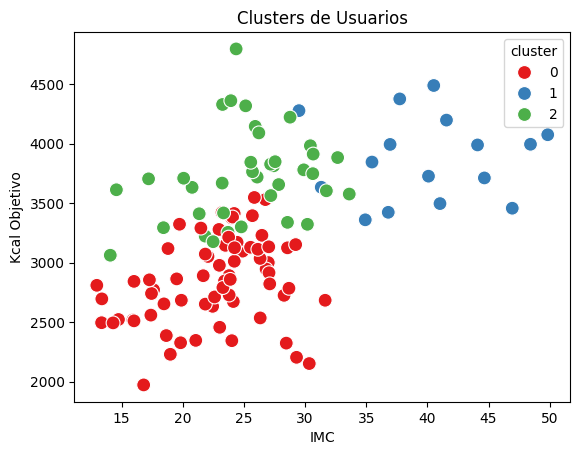

In [108]:

# Graficamos los datos en un gráfico de dispersión usando dos características (IMC y kcal objetivo)
sns.scatterplot(data, x="BMI", y="gasto_kcal_d", hue="cluster", palette="Set1", s=100)

plt.title("Clusters de Usuarios")
plt.xlabel("IMC")
plt.ylabel("Kcal Objetivo")
plt.show()


Cluster 1: Usuarios con IMC bajo, calorías quemadas moderadas, y objetivo calórico bajo. Puedes recomendarles dietas más ligeras.

Cluster 2: Usuarios con IMC alto, calorías quemadas altas, y objetivo calórico alto. Podrías recomendarles ejercicios de mayor intensidad y un menú con más calorías.

Cluster 3: Usuarios con IMC promedio, calorías quemadas altas, y objetivo calórico moderado. Recomendaciones balanceadas.

--------------------------

Vamos a hacer una función donde nos diga las kcal que aporta cada gramo de alimento segun su categoria para hacer la distribución de 50% CH, 35%P y 15%G en el requerimineto calorico diario

In [98]:
def calcular_macronutrientes(calorias_totales):
    carb_cal = 0.50 * calorias_totales
    prot_cal = 0.35 * calorias_totales
    gras_cal = 0.15 * calorias_totales

    carb_g = carb_cal / 4
    prot_g = prot_cal / 4
    gras_g = gras_cal / 9

    return f"CH_g:{carb_g},P_g: {prot_g}, G_g:{gras_g}"

In [99]:
# X_new=[[24,53,1.64,0,23.24,1,1,0,0,19.27]]
# X_new_pol2 = pol_2.transform(X_new)
# y_pred_kcal = model_5.predict(X_new_pol2)
# y_pred_kcal

In [100]:
X_new=[[24,53,1.64,0,23.24,1,1,0,0,19.27]]
y_pred_kcal = rnd_reg.predict(X_new)
y_pred_kcal
kcal_totales=gasto_calorico(0,54,167,0,24,y_pred_kcal)
calcular_macronutrientes(kcal_totales)

c:\Users\UX490U\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


'CH_g:[248.28861976],P_g: [173.80203384], G_g:[33.1051493]'

---------------

# GUARDAR MODELO

In [101]:
import pickle

In [ ]:
with open("../modelos/pol2_reg.pkl", "wb") as model_pol2:
    pickle.dump(pol_2, model_pol2)

In [ ]:
with open("../modelos/kcal_ejer_reg.pkl", "wb") as ejer_kcl:
    pickle.dump(rnd_reg, ejer_kcl)